## Исследование данных о российском кинопрокате



У нас в руках два набора данных, анализируя которые нам предстоит изучить рынок российского кинопроката и понять, каковы его основные тренды.

**Состав данных:**
- Сведения о прокатных удостоверениях (mkrf_movies.csv)
- Сведения о прокате в российских кинотеатрах (mkrf_shows.csv)

Данные будут объединены в датафрейм для последующего анализа.

**Цели исследования:**

1. Определить, сколько фильмов выходило в прокат каждый год и какие данные о прокате нам доступны.
2. Узнать, какова ежегодная динамика проката (максимальные, минимальные, средние и медианные сборы).
3. Понять, как влияло на сборы возрастное ограничение и фильмы с каким порогом возраста зрителей принесли самый большой доход.
4. Выявить, какие ленты получили государственную поддержку, в каком объеме и какова была их прокатная судьба.

**Ход исследования**

Данные хранятся в двух файлах - /datasets/mkrf_movies.csv и /datasets/mkrf_shows.csv. - Их предстоит объединить. Потребуется обзор, проверка данных и исправление ошибок там, где это возможно. Следующим шагом станет добавление ряда столбцов, далее - непосредственный анализ данных.

**Основные этапы исследования**

1. Объединение файлов
2. Обзор данных
3. Предобработка данных:

   - Поиск, оценка и исправление ошибок;

   - Добавление новых столбцов.

4. Оценка числа вышедших фильмов и соотнесение с ними доступных данных о прокате

5. Выявление ежегодной динамики проката

6. Оценка и анализ влияния возрастного ценза на доход от проката.

7. Выявление фильмов, получивших государственную поддержку, и анализ их прокатной судьбы

8. Подготовка общего вывода

### Обзор и объединение данных 

Данные объединяются таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

In [67]:
# импорт библиотеки для работы с данными
import pandas as pd

In [68]:
# открытие и обзор файла с информацией о прокатных удостоверениях
movies = pd.read_csv('mkrf_movies.csv')
display(movies.info())
movies.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [69]:
# открытие и обзор файла с информацией о прокате
shows = pd.read_csv('mkrf_shows.csv')
display(shows.info())
shows.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


In [70]:
# поиск и удаление строки с ошибкой в колонке puNumber файла movies
display(movies.query('puNumber == "нет"'))
movies = movies.query('puNumber != "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# проверка удаления
movies.query('puNumber == "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


In [72]:
# замена типов данных для колонки puNumber в обоих файлах для корректного объединения
movies['puNumber'] = movies['puNumber'].astype('int64')
shows['puNumber'] = shows['puNumber'].astype('int64')
display(movies.info())
shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [73]:
# объединение двух файлов и обзор полученного датасета
data = movies.merge(shows, on = 'puNumber', how = 'left')
display(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Типы данных


In [74]:
# замена типа данных для колонки show_start_date
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')
data['type'] = data['type'].astype('category')
data['age_restriction'] = data['age_restriction'].astype('category')
data['financing_source'] = data['financing_source'].astype('category', errors = 'ignore')
data['production_country'] = data['production_country'].astype('category')

In [75]:
# исправление ошибок и замена типа данных для колонки ratings
display(data['ratings'].unique())
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype('float64', errors = 'ignore')

# проверка удаления знака %
data['ratings'].unique()

# исправление значений, первоначально выраженных в процентах
def fix_ratings(cell):
    if cell > 10:
        return cell/10
    else:
        return cell

data['ratings'] = data['ratings'].apply(fix_ratings)
# проверка исправления
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [76]:
# проверка изменения типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   category           
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   category           
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   category           
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Обработка пропусков


In [77]:
# обзор пропусков
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

##### Обработка пропусков в колонке ratings

In [78]:
# определение индексов строк, где пропущено згначение ratings
list_of_index = data.query('ratings.isna() and budget > 0').index
list_of_index


Int64Index([1448, 2149, 2450, 2816, 2998, 3060, 3384, 3388, 3613, 3654, 5707,
            6244, 6909, 7208, 7343],
           dtype='int64')

In [79]:
# ручная подставнока по данным сайта Кинопоиск
data.at[1448, 'ratings'] = 3.7
data.at[2816, 'ratings'] = 6.3
data.at[2998, 'ratings'] = 5.1
data.at[3384, 'ratings'] = 6.0
data.at[3388, 'ratings'] = 7.2
data.at[3613, 'ratings'] = 5.7
data.at[5707, 'ratings'] = 6.8
data.at[6244, 'ratings'] = 6.4
data.at[6909, 'ratings'] = 7.0
data.at[7208, 'ratings'] = 6.8
data.at[7343, 'ratings'] = 5.2
data.query('title == "Бесславные придурки"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,3.70,NaN,"28,140.00"


Значительное число пропусков в датафрейме не представляется возможным заполнить без получения этих данных от заказчика.

К таким случаям относятся пропуски в колонках:

- refundable_support
- nonrefundable_support
- budget
- financing_source
- genres

Пропуски в колонках film_studio, production_country, director, producer теоретически могут быть заполнены на основании открытых источников, однако эти колонки могу понадобиться только на последнем этапе исследования, в основной части эти данные не используются. Оставим их пока как есть.

Пропуски в колонке ratings могут оказать влияние на последнюю часть исследования (о фильмах, снятых с поддержкой государства). Всего в датасете 15 строк, в которых колонка ratings не заполнена и которые описывают фильмы, снятые с государственной поддержкой. Это почти 5% от всех таких фильмов. Эти пропуски мы заполним данными из открытых источников. Остальные пропуски в колонке ratings заполнить не представляется возможным.

Пропуски в колонке box_office могут быть заполнены медианным значением для групп, в которые будут объединены фильмы по году выхода и возрастной категории, однако нам предстоит ответить на вопрос, какова доля фильмов, для которых известны данные о прокате, поэтому заполнять эти пропуски не следует.

#### Шаг 2.3. Обработка дубликатов

In [80]:
# проверка полных дубликатов
display(data.duplicated().sum())
data_duplicated = data[data.duplicated()]
data_duplicated

0

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Полностью задублированных строк в датасете нет.

Проверим дубликаты в отдельных колонках.

In [81]:
# обработка дубликатов в колонке puNumber
display(data.duplicated(subset = ['puNumber']))
data_puNumber_duplicated = data[data.duplicated(subset = ['puNumber'], keep = False)]
# строки с повторяющимися значениями puNumber
data_puNumber_duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
7480    False
7481    False
7482    False
7483    False
7484    False
Length: 7485, dtype: bool

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [82]:
# проверка, если фильм "Как жениться и остаться холостым" встречается неоднократно.
data.query('title.str.contains("жениться")')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4519,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4662,"Прости, хочу на тебе жениться",121021610,2010-11-22 12:00:00+00:00,Художественный,"Медуза Фильм, Арелла Филмс",Италия,Фредерико Моччиа,Рита Русик,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.70,"драма,мелодрама,комедия",NaN
4672,Обещать - не значит жениться,221162610,2010-12-17 12:00:00+00:00,Художественный,"Уорнер Бразерс, Флауэр Филмз, Интернэшнл Филмп...",США - Германия - Нидерланды,Кен Куопис,"Дрю Бэрримор, Майкл Бегг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,"драма,мелодрама,комедия",NaN


In [83]:
# оставить ту строку, что содежрит puNumber, отличный от фильма "Иоанна - женщина на папском престоле", а также удалить повторяющийся puNumber для фильма "Анализируй это!"
data.drop([4637, 5067], inplace = True)
# проверка удаления
data.query('title.str.contains("жениться")')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4519,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4662,"Прости, хочу на тебе жениться",121021610,2010-11-22 12:00:00+00:00,Художественный,"Медуза Фильм, Арелла Филмс",Италия,Фредерико Моччиа,Рита Русик,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.70,"драма,мелодрама,комедия",NaN
4672,Обещать - не значит жениться,221162610,2010-12-17 12:00:00+00:00,Художественный,"Уорнер Бразерс, Флауэр Филмз, Интернэшнл Филмп...",США - Германия - Нидерланды,Кен Куопис,"Дрю Бэрримор, Майкл Бегг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,"драма,мелодрама,комедия",NaN


In [84]:
# обработка дубликатов в колонке title
display(data.duplicated(subset = ['title']))
data_title_duplicated = data[data.duplicated(subset = ['title'], keep = False)]
# строки с повторяющимися названиями
data_title_duplicated

0       False
1       False
2       False
3        True
4        True
        ...  
7480    False
7481    False
7482    False
7483    False
7484    False
Length: 7483, dtype: bool

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7449,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


Нам известно, что один фильм может получить несколько прокатных удостоверений, поэтому такие строки, где описан один фильм с разными ПУ, оставляем как есть.
Убедимся только, что среди дубликатов по названию, для которых известен бюджет, действительно встречаются только разные фильмы или один фильм с разными ПУ.

In [85]:
data_title_duplicated.query('budget > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3613,Три сестры,111004417,2017-06-09 12:00:00+00:00,Художественный,"ООО ""РТВ"", АО ""ТПО ""Киностудия им. М.Горького""...",Россия,Ю.Грымов,"Ю.Грымов, С.Зернов",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","37,878,787.00",Министерство культуры,5.70,NaN,"1,067,649.00"
5828,Прощаться не будем,111003418,2018-06-21 12:00:00+00:00,Художественный,"ООО ""РФГ Корп"", ООО ""Студия ""МОСТ""",Россия,П.Дроздов,А.Петрухин,«6+» - для детей старше 6 лет,0.00,"35,000,000.00","109,814,241.00",Министерство культуры,5.80,"военный,драма,история","5,539,973.15"
6897,Мысленный волк,111007419,2019-06-09 12:00:00+00:00,Художественный,"ООО ""САГА""",Россия,Валерия Гай Германика,"А.Савельев, А.Васильев, Валерия Гай Германика",«16+» - для детей старше 16 лет,0.00,"30,000,000.00","48,000,000.00",Министерство культуры,5.30,"фэнтези,драма,фильм-нуар","2,258,384.00"
7321,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,"5,000,000.00","20,000,000.00","75,000,000.00",Фонд кино,7.80,драма,"3,181,218.00"
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN


In [86]:
check_title_duplicates = ['Три сестры', 'Прощаться не будем', 'Мысленный волк', 'Успех', 'Вторжение']
data_title_duplicated.query('title == @check_title_duplicates').sort_values(by = 'title')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5429,Вторжение,124002417,2017-08-01 12:00:00+00:00,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.70,"фантастика,боевик",NaN
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN
6487,Мысленный волк,111023718,2019-06-01 12:00:00+00:00,Художественный,"ООО САГа""",Россия,Валерия Гай Германика,"Андрей Савельев, Артем Васильев",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.30,"фэнтези,драма,фильм-нуар",NaN
6897,Мысленный волк,111007419,2019-06-09 12:00:00+00:00,Художественный,"ООО ""САГА""",Россия,Валерия Гай Германика,"А.Савельев, А.Васильев, Валерия Гай Германика",«16+» - для детей старше 16 лет,0.00,"30,000,000.00","48,000,000.00",Министерство культуры,5.30,"фэнтези,драма,фильм-нуар","2,258,384.00"
5828,Прощаться не будем,111003418,2018-06-21 12:00:00+00:00,Художественный,"ООО ""РФГ Корп"", ООО ""Студия ""МОСТ""",Россия,П.Дроздов,А.Петрухин,«6+» - для детей старше 6 лет,0.00,"35,000,000.00","109,814,241.00",Министерство культуры,5.80,"военный,драма,история","5,539,973.15"
6359,Прощаться не будем,111021318,2018-11-06 12:00:00+00:00,Художественный,"ООО ""Студия ""МОСТ"", ООО ""РФГ Корп""",Россия,П.Дроздов,А.Петрухин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"военный,драма,история",NaN
3613,Три сестры,111004417,2017-06-09 12:00:00+00:00,Художественный,"ООО ""РТВ"", АО ""ТПО ""Киностудия им. М.Горького""...",Россия,Ю.Грымов,"Ю.Грымов, С.Зернов",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","37,878,787.00",Министерство культуры,5.70,NaN,"1,067,649.00"
6724,Три сестры,114001219,2019-03-15 12:00:00+00:00,Анимационный,"ФГУП ""ТПО ""Киностудия ""Союзмультфильм""",Россия,С.Андрианова,Б.Машковцев,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,Успех,111027414,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,К.Худяков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,драма,NaN
5936,Успех,111008418,2018-06-14 12:00:00+00:00,Художественный,Сунцов Валентин Валерьевич,Россия,В.Сунцов,В.Сунцов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,драма,NaN


Да, это действительно так.

Проверка на дубликаты в других столбцах нерелевантна, так как то, что формально будет дубликатом, может быть категориальным значением (например, возрастное ограничение) или случайным совпадением (например, фамилия режиссера).

Появление дубликатов в колонке puNumber и title можно объяснить особенностями системы формирования номеров прокатных удостоверений, а именно:
1. Один фильм может получить несколько прокатных удостоверений - для разных способов использования (показ в кинозале или прокат на материальном носителе).
2. Один и тот же номер может быть присвоен нескольким фильмам наряду с другими номерами. Иными словами, если фильму присвоены несколько удостоверений, то одно из них может иметь номер, полностью совпадающий с номером одного из ПУ, выданных другому фильму. Это следует из результатов поиска по названию фильма и по номеру ПУ на сайте Министерства культуры России.

#### Шаг 2.4. Обработка категориальных значений

In [87]:
# значения столбца type
data['type'].unique()

['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']
Categories (8, object): [' Анимационный', ' Художественный', 'Анимационный', 'Документальный', 'Музыкально-развлекательный', 'Научно-популярный', 'Прочие', 'Художественный']

In [88]:
# удаление лишних пробелов в значениях колонки type
data['type'] = data['type'].str.strip()
# проверка удаления
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [89]:
# значения столбца age_restriction
data['age_restriction'].unique()

['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«0+» - для любой зрительской аудитории']
Categories (5, object): ['«0+» - для любой зрительской аудитории', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей', '«6+» - для детей старше 6 лет']

In [90]:
# значения столбца financing_source
data['financing_source'].unique()

[NaN, 'Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']
Categories (3, object): ['Министерство культуры', 'Министерство культуры, Фонд кино', 'Фонд кино']

In [91]:
# значения столбца production_country
data['production_country'].unique()

['США', 'СССР', 'Франция', 'СССР, Венгрия', 'Германия-Великобритания', ..., 'КНР - Франция', 'Дания, Норвегия, Швеция, Исландия', 'Республика Кипр, США, Россия', 'Новая Зеландия - КНР', 'Дания - Канада - Швеция - Франция - Германия ...]
Length: 951
Categories (950, object): [' СССР', ' СССР ', ' СССР   ', '2019', ..., 'Япония, Великобритания, Австрия, Германия, Ю...., 'Япония, США', 'Япония-Великобритания', 'Япония-США-Франция']

In [92]:
# исправление написания страны или списка стран
data['production_country'] = data['production_country'].str.replace(' -', ',', regex = False)
data['production_country'] = data['production_country'].str.replace('-', ', ', regex = False)
data['production_country'] = data['production_country'].str.strip()

In [93]:
# проверка исправления
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобритания,

В категориальных столбцах встречаются лишние пробелы в начале и в конце значения.

#### Шаг 2.5. Проверка и обработка количественных значений

In [94]:
# обзор всех количественных столбцов
numeric_overview = data.describe()
numeric_overview = numeric_overview.T
numeric_overview['bottom_whisker'] = numeric_overview['25%'] - 1.5 * (numeric_overview['75%'] - numeric_overview['25%'])
numeric_overview['upper_whisker'] = numeric_overview['75%'] + 1.5 * (numeric_overview['75%'] - numeric_overview['25%'])
pd.options.display.float_format = '{:,.2f}'.format
numeric_overview

,count,mean,std,min,25%,50%,75%,max,bottom_whisker,upper_whisker
puNumber,"7,483.00","135,173,626.78","38,332,314.26","1,811,096.00","112,025,068.00","121,015,419.00","124,003,312.50","231,001,111.00","94,057,701.25","141,970,679.25"
refundable_support,332.00,"11,864,457.83","24,916,555.26",0.00,0.00,0.00,"15,000,000.00","180,000,000.00","-22,500,000.00","37,500,000.00"
nonrefundable_support,332.00,"48,980,988.89","59,980,117.92",0.00,"25,000,000.00","30,000,000.00","40,375,000.00","400,000,000.00","1,937,500.00","63,437,500.00"
budget,332.00,"127,229,716.68","188,588,333.12",0.00,"42,000,000.00","68,649,916.00","141,985,319.50","2,305,074,303.00","-107,977,979.25","291,963,298.75"
ratings,"6,528.00",6.49,1.11,1.00,5.90,6.60,7.20,9.90,3.95,9.15
box_office,"3,158.00","76,478,696.16","240,353,122.82",0.00,"86,239.00","2,327,987.55","23,979,671.02","3,073,568,690.79","-35,753,909.04","59,819,819.06"


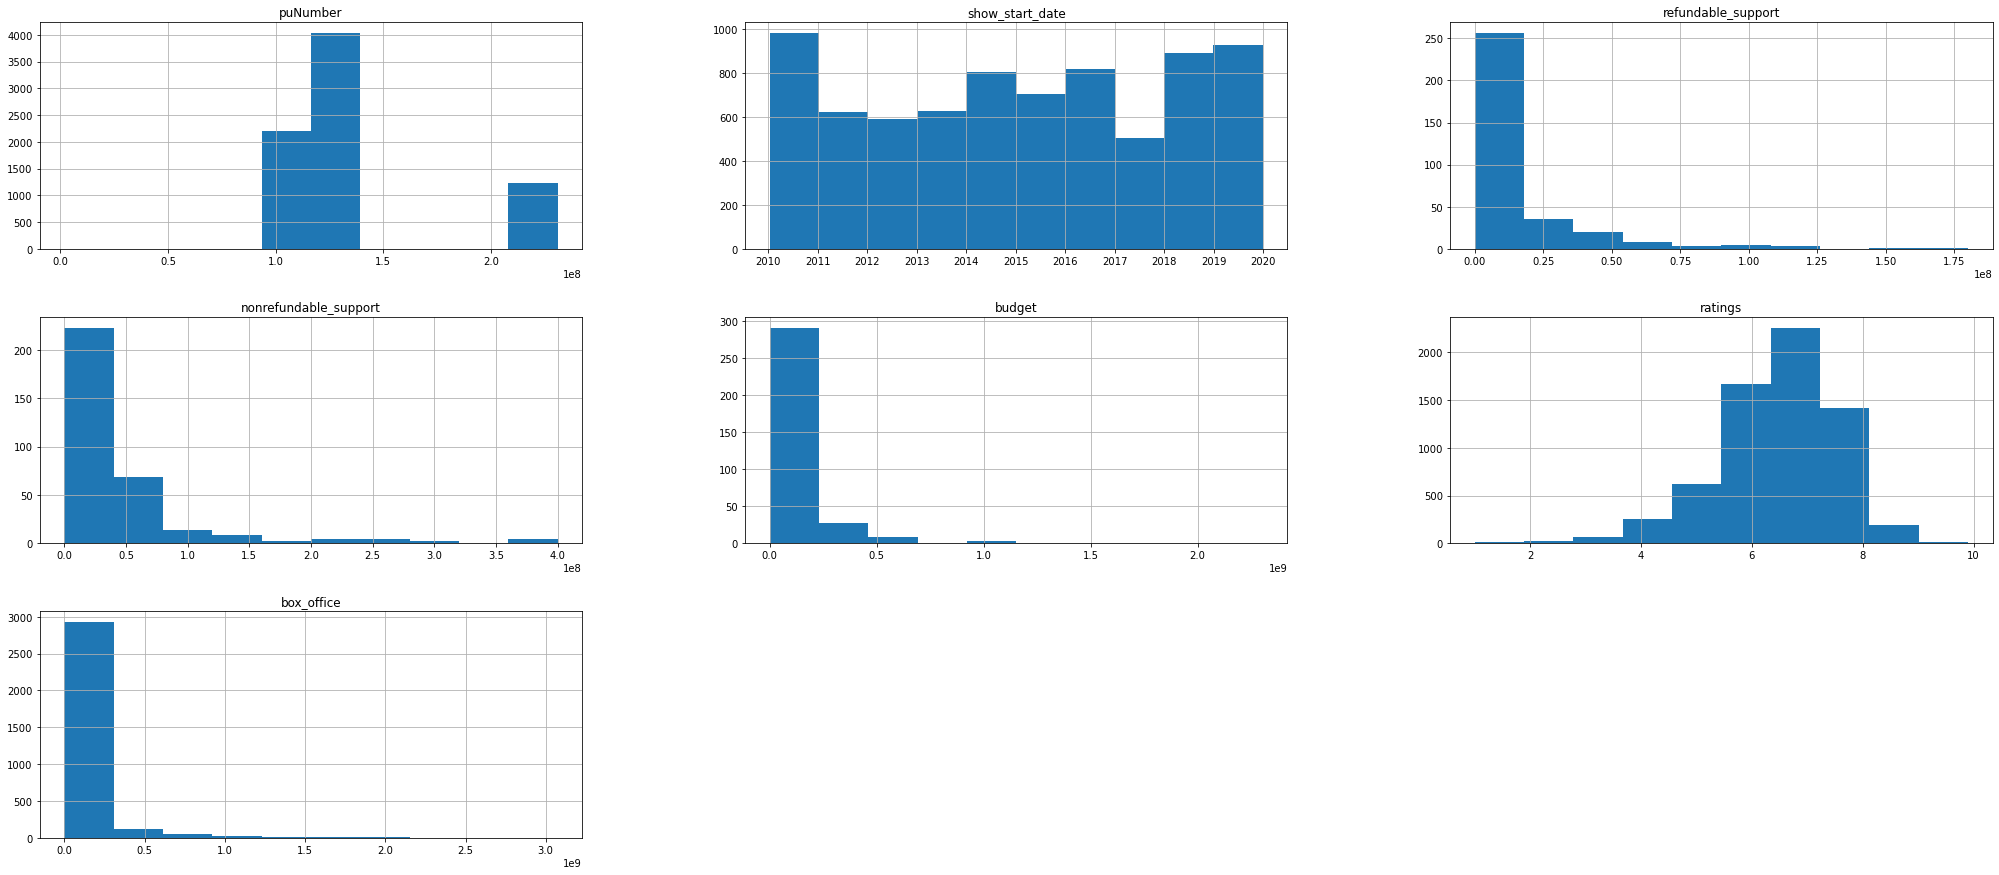

In [95]:
# построение общей гистограммы для всех числовых столбцов. Оси X - единицы измерения, оси Y - число фильмов
data.hist(figsize = (35, 15));

Мы видим, что доступный нам набор кинолент делится на две неравные части - большее число картин с меньшими объемами поддержки гоударства, бюджетами, сборами и меньшее число картин, у которых эти параметры выше среднего. Кроме того, есть еще отдельный совсем небольшой набор фильмов, у которых поддержка / бюджеты и отчасти сборы значительно отстоят от обеих ранее описанных частей. Посмотрим, что кромется за этими графиками.

In [96]:
# проверка, какие значения возвратных / невозвратных средств, а также бюджета отстоят от основной массы значений, хотя формально входят в границы правого уса
data.query('refundable_support > 1.3e8 or nonrefundable_support > 3.5e8 or budget > 0.8e9')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2919,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00","392,104,482.00","635,283,867.00",Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00"
3350,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00","300,000,000.00","684,200,536.00",Фонд кино,6.60,драма,"364,285,139.60"
5436,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,7.70,"фэнтези,комедия,семейный","511,775,548.00"
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00"
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59"
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53"
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN


Похоже, это ряд особо крупных, знаковых проектов, в которые были вложены бОльшие, чем обычно, средства.

In [97]:
# проверка фильмов, вышедших в СССР, то есть очень давно
data.query('production_country == "СССР" and box_office > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.00,"мелодрама,комедия",360.00
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,420.00
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.70,"комедия,мелодрама,криминал",380.00
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.10,драма,"1,165.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,Авария - дочь мента,111023814,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,драма,"5,945.00"
2551,Везучая.,111006815,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,О.Ремизов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"1,660.00"
2553,Витя Глушаков - друг апачей,111007115,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Бежанов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.20,комедия,830.00
3203,Новый Гулливер.,111003816,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Птушко,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.00,"мультфильм,фэнтези,комедия","3,200.00"


Похоже, что прокатные удостоверения, вошедшие в такой запрос, были выданы не для проката в кинозалах, а для выпуска на материальном носителе. Удалим их, чтобы не искажать данные о сборах в прокате.

In [98]:
# удаление строк с прокатными удостоверениями для выпуска на материальном носителе
data = data.query('~(production_country == "СССР" and box_office > 0)')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7411 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7411 non-null   object             
 1   puNumber               7411 non-null   int64              
 2   show_start_date        7411 non-null   datetime64[ns, UTC]
 3   type                   7411 non-null   object             
 4   film_studio            7393 non-null   object             
 5   production_country     7409 non-null   object             
 6   director               7402 non-null   object             
 7   producer               6915 non-null   object             
 8   age_restriction        7411 non-null   category           
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [99]:
# проверка удаления
data.query('production_country == "СССР" and box_office > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [100]:
# проверка фильмов с крайне низким значением box_office - ниже первого квантиля
data.query('box_office <= 86239').sort_values(by = 'box_office')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1977,Люблю твою жену,121013014,2014-06-23 12:00:00+00:00,Художественный,"Серендипити Пойнт Фильм, Номадик Пикчерз",Канада,Джеримайя С.Чечик,"Стефен Аликс, Эри Лантос, Роберт Лантош",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,"мелодрама,комедия",0.00
4789,КРАСНЫЙ ЛЕД. Сага о хантах Югры,111005910,2010-06-04 12:00:00+00:00,Художественный,"Департамент культуры и искусства ХМАО-Югры, ОО...",Россия,О.Фесенко,О.Урушев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.50,"драма,история",0.00
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"аниме,мультфильм,драма",0.00
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.70,"аниме,мультфильм,фантастика",0.00
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,биография,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,Белка и Стрелка. Лунные приключения,114000613,2013-12-17 12:00:00+00:00,Анимационный,"ООО ""КиноАтис""",Россия,"А.Храмцов, В.Сотсков, И.Евланникова","С.Зернов, В.Сотсков, А.Златопольский, Ю.Матяш",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.80,"мультфильм,комедия,приключения","83,448.00"
2749,Деган Аз (Зов Сердца),111017215,2015-09-30 12:00:00+00:00,Художественный,"ООО Киностудия ""Чеченфильм""",Россия,Б.Терекбаев,"Б.Терекбаев, А.Яхъяев, М.Вараев, М.Гамзян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"83,950.00"
3627,Фанат (2016),121032516,2016-12-08 12:00:00+00:00,Художественный,"Формула Филм, Рэдчилиз, Яш Рай Филмз",Индия,Маниш Шарма,Адитья Чопра,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"боевик,триллер,драма","84,370.00"
691,Дочь,111004712,2012-09-25 12:00:00+00:00,Художественный,"ОАО ""ТПО ""Киностудия им. М.Горького"", ООО ""Вал...",Россия,"А.Касаткин, Н.Назарова","С.Зернов, С.Кучмаева",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,детектив,криминал","85,153.00"


Эти строки тоже выглядят как выпуск на носителях по двум причинам: давний год выхода фильма (для некоторых картин) и низкая сумма сборов (трудно представить, чтобы лента собрала менее 100 тыс. рублей в кинотеатрах, сколь бы неудачной она ни была...). Удалим эти строки.

In [101]:
# удаление строк со слишком низкими сборами
data = data.query('~(box_office <= 86239)')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6692 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6692 non-null   object             
 1   puNumber               6692 non-null   int64              
 2   show_start_date        6692 non-null   datetime64[ns, UTC]
 3   type                   6692 non-null   object             
 4   film_studio            6675 non-null   object             
 5   production_country     6690 non-null   object             
 6   director               6684 non-null   object             
 7   producer               6212 non-null   object             
 8   age_restriction        6692 non-null   category           
 9   refundable_support     311 non-null    float64            
 10  nonrefundable_support  311 non-null    float64            
 11  budget                 311 non-null    float64          

In [102]:
# проверка удаления
data.query('box_office <= 86239').sort_values(by = 'box_office')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [103]:
# проверка сборов, чьи значения находятся в пределах между первым и вторым квантилями
data.query('box_office > 86239 and box_office <= 2.327988e+06')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз","США, Великобритания",Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный","759,526.00"
111,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.00,"фэнтези,приключения,семейный","1,093,810.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,125,302.00"
114,Гарри Поттер и философский камень /По роману Д...,121025916,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз/1492 Пикчерз/Данк...",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,948,760.00"
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз","США, Великобритания",Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"фэнтези,приключения,семейный","843,310.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,Выпьем за любовь,121036319,2019-12-06 12:00:00+00:00,Художественный,"Константин филм, Глобал скрин",Германия,Зёнке Вортманн,"Том Списс, Марк Конрад, Сьюзанн Функе",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.50,комедия,"836,561.00"
7456,Шарнохой - жёлтый пёс,111021819,2019-12-12 12:00:00+00:00,Художественный,"ООО Студия ""БурятКино""",Россия,Б.Дышенов,Б.Дышенов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,"129,500.00"
7458,Эрмитаж. Сила искусства,126007819,2019-12-11 12:00:00+00:00,Прочие,"3D Продуциони, Нексо Диджитал",Италия,Микеле Малли,"Диди Ньокки, Франко Ди Сарро",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,"1,032,821.51"
7462,Небо измеряется милями,111021919,2019-12-19 12:00:00+00:00,Художественный,"ООО ""РБ ПРОДАКШН""",Россия,К.Буслов,К.Буслов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.50,"военный,история","367,224.00"


Выборка выглядит чрезвычайно странно: например, "Гарри Поттер и Кубок Огня" собрал в России свыше 7.8 млн. долларов (по данным Кинопоиска), а в соответствующей строке датасета мы видим 843 тыс. рублей. При этом у фильма еще два ПУ, для который нет данных о сборах.
Не имея в распоряжении других данных, мы должны работать с тем что есть, но низкое качество данных придется учитывать при формировании общих выводов.

In [104]:
# проверка значенй колонки ratings, выходщих за пределы правого уса
data.query('ratings <= 9.9 and ratings > 9.1')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...","Аргентина, Бразилия",Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.90,"ужасы,триллер,драма",NaN
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.70,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,9.90,"триллер,драма,детектив",NaN
2145,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,9.40,"фантастика,боевик,комедия","334,750.00"
3584,"Машины Страшилки. Серия ""Жутчайшая повесть о п...",114003916,2016-12-09 12:00:00+00:00,Анимационный,"ООО Студия ""АНИМАККОРД"", АНИМАККОРД ЛТД.","Россия, Республика Кипр",Д.Червяцов,"Д.Ловейко, О.Кузовков",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,9.70,"мультфильм,ужасы,фэнтези",NaN
3947,Круиз.,211038210,2010-09-03 12:00:00+00:00,Художественный,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""",Россия,И.Ромащенко,Р.Атамалибеков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.70,"приключения,комедия,фэнтези",NaN
5820,Свинья,121007018,2018-04-11 12:00:00+00:00,Художественный,"Дарк Прекёрсор Продакшен, Филмиран, Хедейт Филм",Иран,Мани Хагиги,Мани Хагиги,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,9.40,"триллер,драма","1,587,221.51"
5909,Мира,112000118,2018-06-04 12:00:00+00:00,Документальный,"ООО ""Компания ""Новые люди""",Россия,Д.Шабаев,Н.Мокрицкая,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,9.40,драма,NaN
6615,ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ,111026518,2019-01-21 12:00:00+00:00,Художественный,ИП Вайсман Анатолий Александрович,Россия,"А.Сазонов, Е.Климович, А.Коломеец, С.Черникова...","Д.Руюежин, Л.Пятницкая, Д.Колеров, Э.Ким, А.Хомич",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,9.80,"фантастика,боевик",NaN
6881,Животные рядом со Святыми,112003719,2019-05-03 12:00:00+00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,9.90,"криминал,драма",NaN


Крайне странно выглядят строки в таком запросе. Эти ленты точно не были на слуху в прессе и наружной рекламе, хоть для двух из них и указаны суммы сборов. Рейтинги свыше 9.1 здесь похожи на выбросы. Удалим их.

In [105]:
# удаление строк с рейтингом, выходящим за границы правого уса
data = data.query('~(ratings <= 9.9 and ratings > 9.1)')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6682 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6682 non-null   object             
 1   puNumber               6682 non-null   int64              
 2   show_start_date        6682 non-null   datetime64[ns, UTC]
 3   type                   6682 non-null   object             
 4   film_studio            6665 non-null   object             
 5   production_country     6680 non-null   object             
 6   director               6674 non-null   object             
 7   producer               6202 non-null   object             
 8   age_restriction        6682 non-null   category           
 9   refundable_support     310 non-null    float64            
 10  nonrefundable_support  310 non-null    float64            
 11  budget                 310 non-null    float64          

In [106]:
# проверка удаления
data.query('ratings <= 9.9 and ratings > 9.1')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


В количественных столбцах наиболее подозрительными выглядят слишком низкие суммы сборов. Мы предполагаем, что такие сроки описывают выапуск фильмов не в широкий прокат, а для распространения на метариальном носителе.

Также серьезные сомнения вызывают ленты,имеющие рейтинг выше 9.1.

Такие строки удалены.

In [107]:
# проверка строк, где бюджет меньше суммы государственной поддержки
data.query('budget < refundable_support or budget < nonrefundable_support or budget < refundable_support + nonrefundable_support')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


В данных присутствуют также 17 случаев, когда значение общего бюджета ниже суммы государственной поддержки. Удалим их.

In [108]:
# удаление строк с бюджетом ниже государственной поддержки
data = data.query('~(budget < refundable_support or budget < nonrefundable_support or budget < refundable_support + nonrefundable_support)')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6665 non-null   object             
 1   puNumber               6665 non-null   int64              
 2   show_start_date        6665 non-null   datetime64[ns, UTC]
 3   type                   6665 non-null   object             
 4   film_studio            6648 non-null   object             
 5   production_country     6663 non-null   object             
 6   director               6657 non-null   object             
 7   producer               6185 non-null   object             
 8   age_restriction        6665 non-null   category           
 9   refundable_support     293 non-null    float64            
 10  nonrefundable_support  293 non-null    float64            
 11  budget                 293 non-null    float64          

In [109]:
# проверка удаления
data.query('budget < refundable_support or budget < nonrefundable_support or budget < refundable_support + nonrefundable_support')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


#### Шаг 2.6. Добавление новых столбцов





In [110]:
# вывод года выхода в отдельную колонку
data['show_start_year'] = pd.DatetimeIndex(data['show_start_date']).year
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015


In [111]:
# функция для вывода в отдельные колонки имени главного режиссера и основного жанра
def new_column(column, delim):
    return column.str.split(delim).str[0]
# применение функции
data['main_director'] = new_column(data['director'], ', ')
data['main_genre'] = new_column(data['genres'], ',')

In [112]:
# расчет доли государственной поддержки и добавление соответствующей колонки
data['governor_support_rate'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget'] * 100
data.query('financing_source == "Министерство культуры"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,governor_support_rate
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,33.37
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,62.48
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,"25,000,000.00","51,850,000.00",Министерство культуры,6.10,"мультфильм,фэнтези,история","15,078,858.60",2015,С.Серегин,мультфильм,48.22
1990,Смайлик,111008614,2014-08-08 12:00:00+00:00,Художественный,"ООО ""Продюсерская кинокомпания ""Киномир""",Россия,Т.Аленикова,Т.Яковенко,«16+» - для детей старше 16 лет,0.00,"25,000,000.00","36,259,500.00",Министерство культуры,6.80,мелодрама,"554,251.00",2014,Т.Аленикова,мелодрама,68.95
2013,Дедушка моей мечты,111007714,2014-07-22 12:00:00+00:00,Художественный,"ООО ""Пендулум""",Россия,А.Стриженов,"Л.Якубович, А.Стриженов, Л.Лищинская",«12+» - для детей старше 12 лет,0.00,"28,000,000.00","74,910,000.00",Министерство культуры,5.70,"комедия,семейный","6,277,796.20",2014,А.Стриженов,комедия,37.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,РОБО,111017319,2019-10-30 12:00:00+00:00,Художественный,"ООО ""Лаборатория Кино""",Россия,С.Андреасян,"А.Ананикян, Г.Андреасян, С.Андреасян",«6+» - для детей старше 6 лет,0.00,"30,000,000.00","140,025,000.00",Министерство культуры,7.60,"фантастика,боевик,триллер","66,504,721.61",2019,С.Андреасян,фантастика,21.42
7319,Новогодний ремонт,111018219,2019-11-07 12:00:00+00:00,Художественный,"ООО ""ВитЭл""",Россия,А.Пинхасов,"Е.Михайлова, В.Галыгин, В.Колесник, А.Седых, Г...",«12+» - для детей старше 12 лет,0.00,"20,000,000.00","30,448,911.00",Министерство культуры,5.60,"комедия,мелодрама","3,591,456.36",2019,А.Пинхасов,комедия,65.68
7329,Лев Яшин. Вратарь моей мечты,111018719,2019-11-21 12:00:00+00:00,Художественный,"ООО ""Кремлин Филмз""",Россия,В.Чигинский,О.Капанец,«6+» - для детей старше 6 лет,0.00,"60,000,000.00","360,054,850.00",Министерство культуры,6.90,"биография,спорт,драма","114,090,162.74",2019,В.Чигинский,биография,16.66
7343,Кроличья лапа,111018919,2019-11-20 12:00:00+00:00,Художественный,"ООО ""Зебра"", ""Артемис"", ""Гринлит""","Россия, Бельгия, Финляндия",Н.Джорджадзе,Ю.Соболевская,«16+» - для детей старше 16 лет,0.00,"30,000,000.00","47,734,050.00",Министерство культуры,5.20,NaN,NaN,2019,Н.Джорджадзе,NaN,62.85


### Шаг 3. Исследовательский анализ данных


,show_start_date,box_office,rate
show_start_year,,,
2010,880,3,0.34
2011,519,6,1.16
2012,474,10,2.11
2013,462,17,3.68
2014,645,118,18.29
2015,640,401,62.66
2016,754,463,61.41
2017,498,350,70.28
2018,878,463,52.73


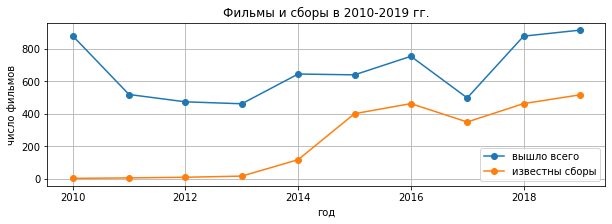

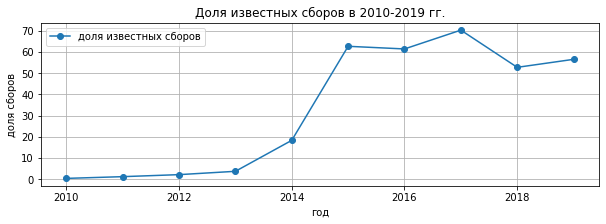

In [113]:
# число фильмов, выходивших ежегодно
films_per_year = data.pivot_table(index = 'show_start_year', values = 'show_start_date', aggfunc = 'count')
# число фильмов, для которых известны кассовые сборы
box_office_info_per_year = data.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'count')
# таблица, где объединены два предыдущих датафрейма
box_office_info_rate = films_per_year.merge(box_office_info_per_year, on = 'show_start_year')
# расчет доли фильмов, для которых известны кассовые сборы
box_office_info_rate['rate'] = box_office_info_rate['box_office'] / box_office_info_rate['show_start_date'] * 100
display(box_office_info_rate)
# график, объединяющий данные о числе фильмов в год и об известных кассовых сборах
plt = box_office_info_rate[['show_start_date','box_office']].plot(style='o-', title = 'Фильмы и сборы в 2010-2019 гг.', xlabel = 'год', ylabel = 'число фильмов', grid=True, figsize=(10, 3));
display(plt.legend(['вышло всего', 'известны сборы']));
#  график о доле сборов среди всех фильмов
plt_2 = box_office_info_rate[['rate']].plot(style='o-', title = 'Доля известных сборов в 2010-2019 гг.', xlabel = 'год', ylabel = 'доля сборов', grid=True, figsize=(10, 3));
plt_2.legend(['доля известных сборов']);

До 2014 года информации о кассовых сборах почти не было. В дальнейшем кривая сборов примерно повторяет кривую вышедших фильмов, а кривая доли сборов продолжала расти даже тогда, когда число выходящих картин снизилось после 2016 года.

,box_office
show_start_year,
2010,"1,860,441.00"
2011,"13,188,961.00"
2012,"5,533,885.00"
2013,"28,352,888.20"
2014,"7,433,274,634.60"
2015,"38,525,765,005.19"
2016,"46,740,507,379.48"
2017,"48,457,931,455.75"
2018,"49,250,006,040.19"


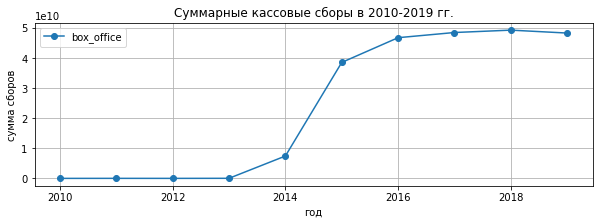

In [114]:
# визуализация ежегодной динамики суммы сборов
box_office_per_year = data.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'sum')
display(box_office_per_year)
box_office_per_year.plot(style='o-', title = 'Суммарные кассовые сборы в 2010-2019 гг.', xlabel = 'год', ylabel = 'сумма сборов', grid=True, figsize=(10, 3));

До 2013 года доступные данные показывают нам крайне низкие сборы, однако в 2014 году начинается быстрый рост, и к 2016 году  сборы превышают 47 млрд. рублей.

Минимальные сборы наши данные фиксируют в 2013 году - порядка 13 млн. 200 тыс., максимальные - почти 49 млрд. 670 млн. в 2018 году.

,box_office,median,mean
show_start_year,,,
2010,"1,860,441.00","245,630.00","620,147.00"
2011,"13,188,961.00","263,820.00","2,198,160.17"
2012,"5,533,885.00","340,584.50","553,388.50"
2013,"28,352,888.20","177,120.00","1,667,816.95"
2014,"7,433,274,634.60","948,195.75","62,993,852.84"
2015,"38,525,765,005.19","9,358,511.30","96,074,226.95"
2016,"46,740,507,379.48","6,003,344.53","100,951,419.83"
2017,"48,457,931,455.75","10,441,608.00","138,451,232.73"
2018,"49,250,006,040.19","9,314,710.50","106,371,503.33"


<AxesSubplot:title={'center':'Сумма сборов в 2010-2019 гг.'}, xlabel='год', ylabel='сумма сборов'>

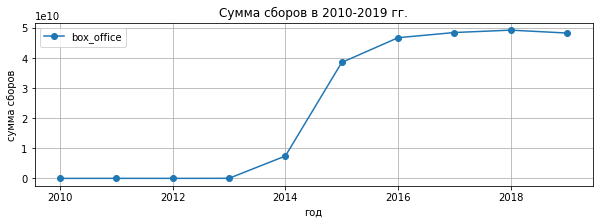

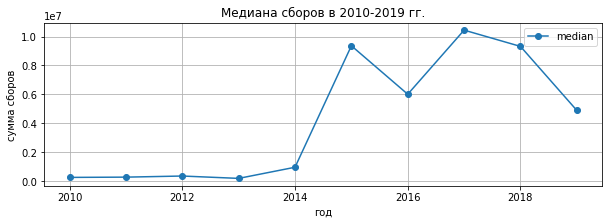

In [115]:
# расчет медиан и средних значений для ежегодных сборов
box_office_per_year['median'] = data.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['median'])
box_office_per_year['mean'] = data.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['mean'])
display(box_office_per_year)
display(box_office_per_year[['box_office']].plot(style='o-', title = 'Сумма сборов в 2010-2019 гг.', xlabel = 'год', ylabel = 'сумма сборов', grid=True, figsize=(10, 3)));
box_office_per_year[['median']].plot(style='o-', title = 'Медиана сборов в 2010-2019 гг.', xlabel = 'год', ylabel = 'сумма сборов', grid=True, figsize=(10, 3));

При росте обшей суммы сборов их медиана резкое снижение в 2016 году, потом скачок и снова снижение еще более глубокое, чем в 2016. Похоже, в момент громких кинопремьер сборы резко растут, и это влияет на медиану, однако в периоды "затишья" медиана показывает тенденцию к снижению.

In [116]:
# расчет зависимости суммы сборов от возрастного ограничения
age_box_office_dependancy = data.query('show_start_year >= 2015 and show_start_year <= 2019').pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = 'sum')
age_box_office_dependancy

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,"808,658,897.97"
«12+» - для детей старше 12 лет,"59,367,990,000.10"
«16+» - для детей старше 16 лет,"75,100,601,373.60"
«18+» - запрещено для детей,"40,755,122,780.10"
«6+» - для детей старше 6 лет,"55,219,286,409.52"


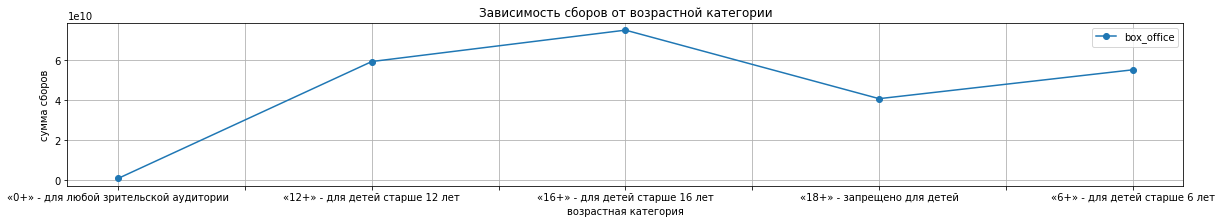

In [117]:
# визуализация зависимости суммы сборов от возрастного ограничения
age_box_office_dependancy.plot(style='o-', title = 'Зависимость сборов от возрастной категории', xlabel = 'возрастная категория', ylabel = 'сумма сборов', grid=True, figsize=(20, 3));

Больше всего денег приносят фильмы возрастной категории 16+ - для детей старше 16 лет.

In [118]:
# оценка динамики зависимости сборов от возрастного ограничения по годам
age_box_office_dependancy_per_year = data.query('show_start_year >= 2015 and show_start_year <= 2019').pivot_table(index = ['show_start_year', 'age_restriction'], values = 'box_office', aggfunc = 'sum')
age_box_office_dependancy_per_year

box_office
show_start_year age_restriction                                         
2015            «0+» - для любой зрительской аудитории    378,957,673.37
                «12+» - для детей старше 12 лет        13,419,054,999.61
                «16+» - для детей старше 16 лет        10,781,092,475.77
                «18+» - запрещено для детей             5,430,031,465.93
                «6+» - для детей старше 6 лет           8,516,628,390.51
2016            «0+» - для любой зрительской аудитории    149,988,225.67
                «12+» - для детей старше 12 лет        11,150,415,612.96
                «16+» - для детей старше 16 лет        16,593,467,678.24
                «18+» - запрещено для детей             6,793,673,702.87
                «6+» - для детей старше 6 лет          12,052,962,159.74
2017            «0+» - для любой зрительской аудитории    229,598,930.00
                «12+» - для детей старше 12 лет         7,851,357,490.67
                «16+» - для детей старше 16 лет        18,694,590,951.06
                «18+» - запрещено для детей             9,651,349,953.02
                «6+» - для детей старше 6 лет          12,031,034,131.00
2018            «0+» - для любой зрительской аудитории     32,449,002.11
                «12+» - для детей старше 12 лет        14,267,129,248.19
                «16+» - для детей старше 16 лет        16,278,323,440.93
                «18+» - запрещено для детей             8,758,345,054.64
                «6+» - для детей старше 6 лет           9,913,759,294.32
2019            «0+» - для любой зрительской аудитории     17,665,066.82
                «12+» - для детей старше 12 лет        12,680,032,648.67
                «16+» - для детей старше 16 лет        12,753,126,827.60
                «18+» - запрещено для детей            10,121,722,603.64
                «6+» - для детей старше 6 лет          12,704,902,433.95

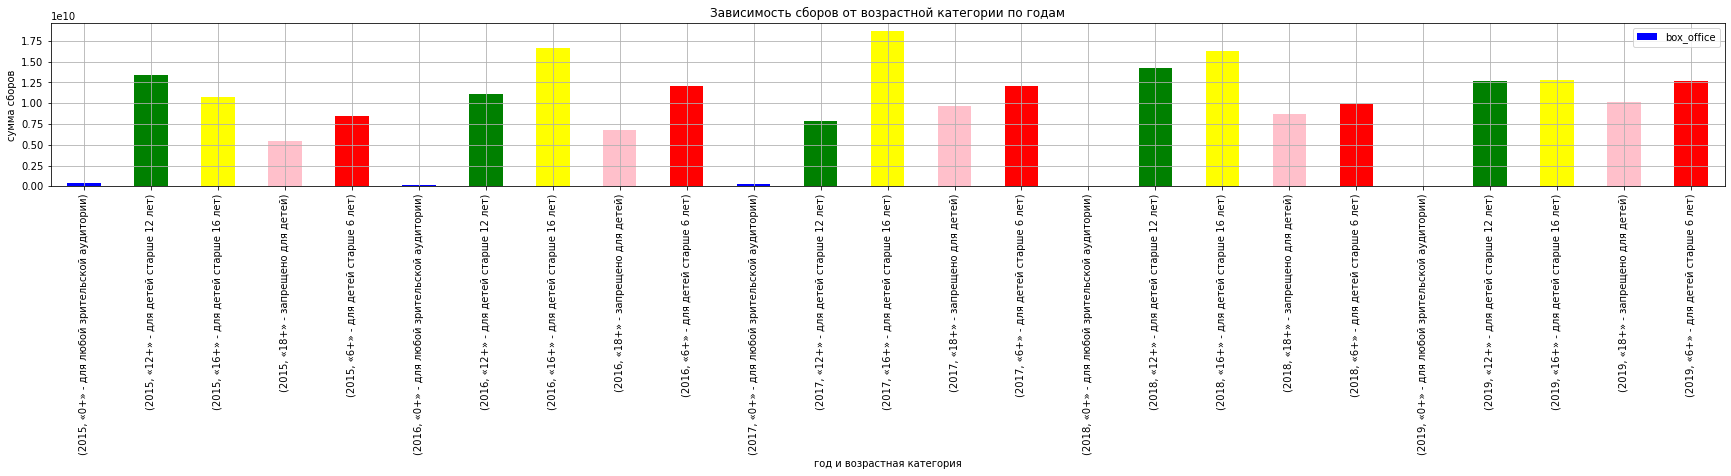

In [127]:
# визуализация динамики зависимости сборов от возрастного ограничения по годам
age_box_office_dependancy_per_year = age_box_office_dependancy_per_year.T
age_box_office_dependancy_per_year.plot(kind = 'bar', y = 'box_office', title = 'Зависимость сборов от возрастной категории по годам', xlabel = 'год и возрастная категория', ylabel = 'сумма сборов', color = ['blue', 'green', 'yellow', 'pink', 'red'], grid=True, figsize=(30, 3), legend=True);

Оценивая наиболее прибыльную возрастную категорию в период с 2015 по 2019 годы, мы увидим, что как правило, первенство принадлежит категории 16+, однако в 2015 и 2019 года категория 12+ перехватила лидерство. Взглянем на выборки фильмов, вышедших в эти годы.

In [ ]:
# оценка числа картин в каждой категории по двум годам - 2015 и 2019
age_rest_box_leader = data.query('box_office > 0 and (show_start_year == 2015 or show_start_year == 2019)').pivot_table(index = ['show_start_year', 'age_restriction'], values = 'title', aggfunc = 'count')
age_rest_box_leader

In [ ]:
data.query('show_start_year == 2015 and age_restriction == "«12+» - для детей старше 12 лет" and box_office > 0').sort_values(by = 'box_office', ascending = False)

In [ ]:
data.query('show_start_year == 2019 and age_restriction == "«12+» - для детей старше 12 лет" and box_office > 0').sort_values(by = 'box_office', ascending = False).head(20)

Похоже, в 2015 и 2019 годах на экраны выходили знаковые ленты, части легендарных саг, получившие категорию 12+ и собравшие значительные суммы, а также самостоятельные картины с масштабными рекламными кампаниями. В 2015 это, например, "Звёздные войны: Пробуждение силы" (свыше полутора миллиардов рублей), а в 2019 - "Холоп" с тремя миллиардами рублей.

Это могло пошатнуть традиционное лидерство категории 16+.

### Шаг 4. Анализ фильмов, которые получили государственную поддержку

In [121]:
# вывод картин, получивших поддержку государства, в отдельную переменную
local_movies = data.query('financing_source in ["Министерство культуры", "Фонд кино", "Министерство культуры, Фонд кино"]')
# расчет суммарной поддержки
local_movies['total_support'] = local_movies['refundable_support'] + local_movies['nonrefundable_support']
# обзор получившегося датасета
local_movies

C:\Users\forea\AppData\Local\Temp\ipykernel_13152\949685845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_movies['total_support'] = local_movies['refundable_support'] + local_movies['nonrefundable_support']


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,governor_support_rate,total_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,33.37,"26,500,000.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,61.27,"107,847,945.00"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,62.48,"25,000,000.00"
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,...,"51,850,000.00",Министерство культуры,6.10,"мультфильм,фэнтези,история","15,078,858.60",2015,С.Серегин,мультфильм,48.22,"25,000,000.00"
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,"50,000,000.00",...,"220,588,394.00",Фонд кино,8.50,"драма,военный,история","249,166,767.70",2015,Р.Давлетьяров,драма,68.00,"150,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,"980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53",2019,А.Кравчук,история,51.02,"500,000,000.00"
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00",2019,Д.Шмидт,мультфильм,52.63,"100,000,000.00"
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,"944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,52.97,"500,000,000.00"
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,"46,154,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,65.00,"30,000,000.00"


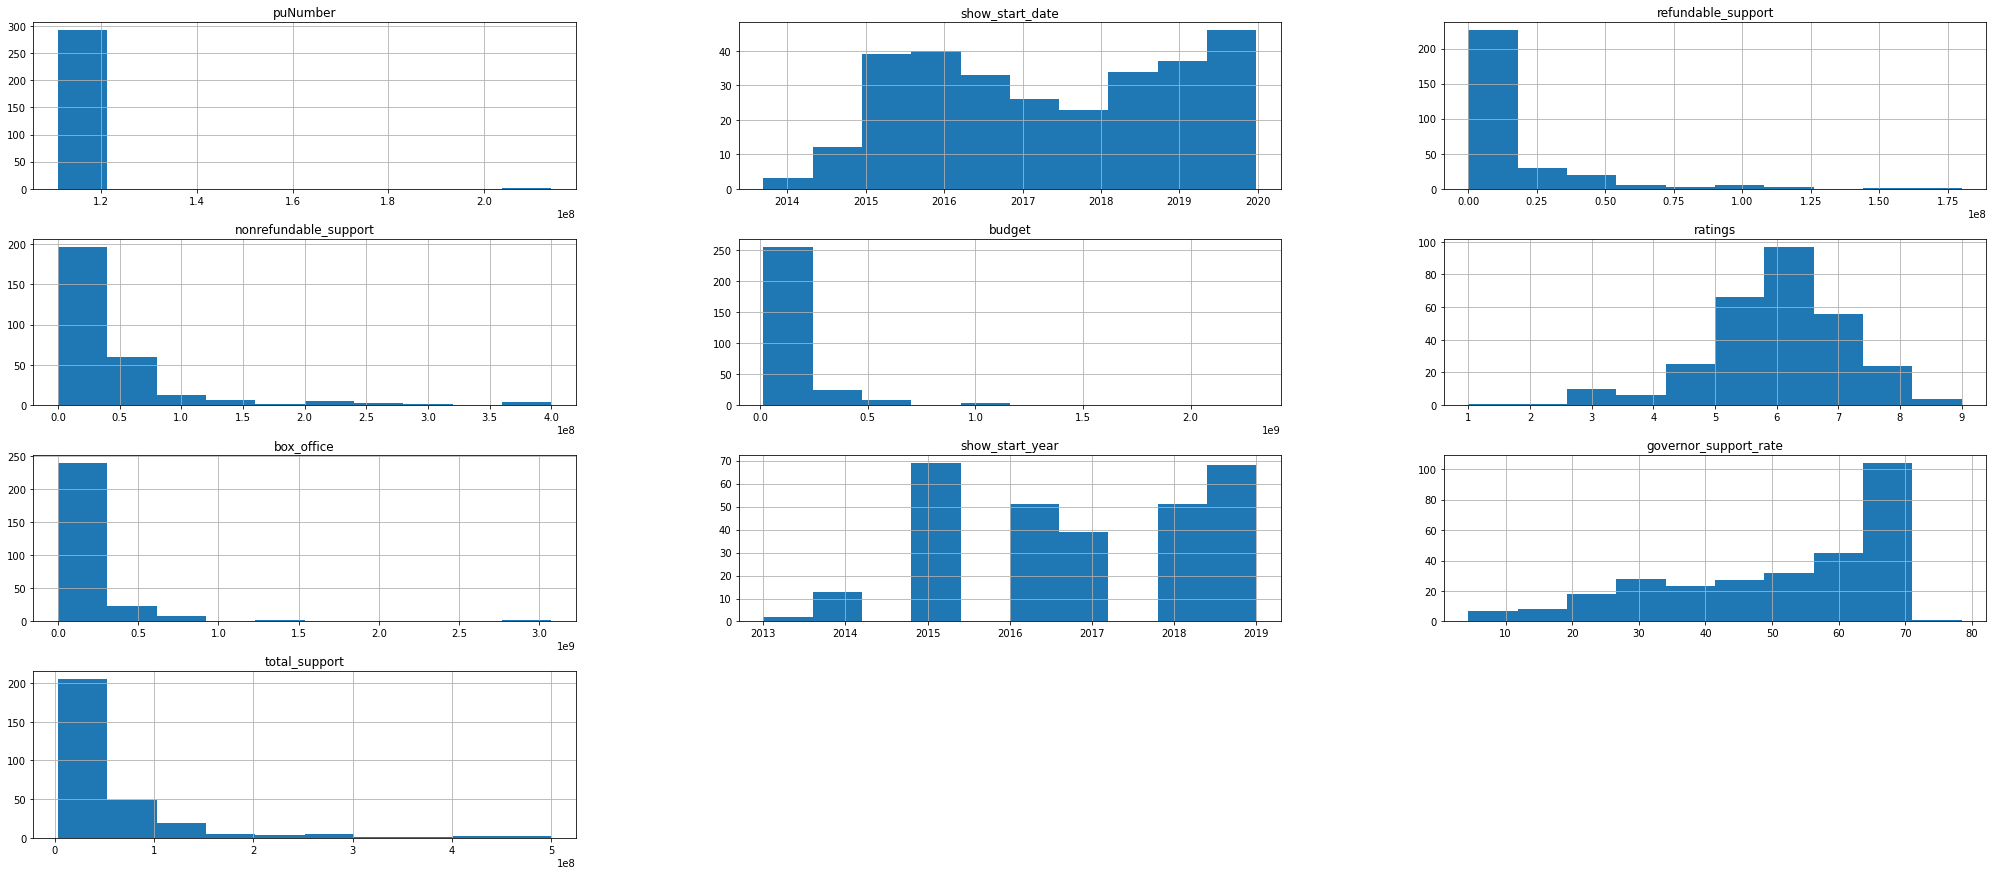

In [122]:
# построение общей гистограммы для всех числовых столбцов. Оси X - единицы измерения, оси Y - число фильмов
local_movies.hist(figsize = (35, 15));

In [123]:
# обзор корреляции
local_movies.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,governor_support_rate,total_support
puNumber,1.00,0.00,-0.04,-0.02,0.04,0.06,-0.03,0.00,-0.03
refundable_support,0.00,1.00,0.37,0.66,0.02,0.32,0.06,-0.01,0.65
nonrefundable_support,-0.04,0.37,1.00,0.63,0.14,0.44,0.11,0.14,0.95
budget,-0.02,0.66,0.63,1.00,0.09,0.37,0.14,-0.29,0.74
ratings,0.04,0.02,0.14,0.09,1.00,0.16,0.04,-0.02,0.12
box_office,0.06,0.32,0.44,0.37,0.16,1.00,0.11,-0.11,0.48
show_start_year,-0.03,0.06,0.11,0.14,0.04,0.11,1.00,-0.05,0.11
governor_support_rate,0.00,-0.01,0.14,-0.29,-0.02,-0.11,-0.05,1.00,0.11
total_support,-0.03,0.65,0.95,0.74,0.12,0.48,0.11,0.11,1.00


Нет какой бы то ни было очевидной прямой корреляции между количественными столбцами.

In [124]:
# общий обзор отечественных фильмов, вошедших в датасет
local_movies_overview = local_movies.describe()
local_movies_overview = local_movies_overview.T
local_movies_overview['bottom_whisker'] = local_movies_overview['25%'] - 1.5 * (local_movies_overview['75%'] - local_movies_overview['25%'])
local_movies_overview['upper_whisker'] = local_movies_overview['75%'] + 1.5 * (local_movies_overview['75%'] - local_movies_overview['25%'])
display(local_movies_overview)
# запрос для поочередного вывода разных наборов строк
local_movies.query('ratings > 8.5').sort_values(by = 'ratings', ascending = False)

,count,mean,std,min,25%,50%,75%,max,bottom_whisker,upper_whisker
puNumber,293.00,"111,610,403.15","6,058,908.67","111,000,116.00","111,005,416.00","111,010,515.00","111,017,815.00","214,010,116.00","110,986,817.50","111,036,413.50"
refundable_support,293.00,"12,346,416.38","25,885,878.53",0.00,0.00,0.00,"15,000,000.00","180,000,000.00","-22,500,000.00","37,500,000.00"
nonrefundable_support,293.00,"49,482,316.88","61,826,813.18",0.00,"25,000,000.00","30,000,000.00","40,000,000.00","400,000,000.00","2,500,000.00","62,500,000.00"
budget,293.00,"139,938,447.75","196,871,132.79","14,462,464.00","46,923,776.00","77,000,000.00","156,360,666.00","2,305,074,303.00","-117,231,559.00","320,516,001.00"
ratings,290.00,6.03,1.14,1.00,5.40,6.20,6.70,9.00,3.45,8.65
box_office,279.00,"140,999,844.33","350,282,110.32","87,810.00","1,680,800.00","18,780,020.90","114,007,757.87","3,073,568,690.79","-166,809,636.81","282,498,194.68"
show_start_year,293.00,"2,016.83",1.65,"2,013.00","2,015.00","2,017.00","2,018.00","2,019.00","2,010.50","2,022.50"
governor_support_rate,293.00,51.09,17.02,4.40,36.84,58.32,65.00,78.47,-5.39,107.24
total_support,293.00,"61,828,733.27","75,304,475.09","3,000,000.00","25,000,000.00","35,000,000.00","60,000,000.00","500,000,000.00","-27,500,000.00","112,500,000.00"


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,governor_support_rate,total_support
3138,Я умею вязать,111019615,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.00,...,"14,462,464.00",Министерство культуры,9.00,драма,"801,370.00",2015,Н.Степанова при участии С.Иванова,драма,32.50,"4,700,000.00"


Рассмотрим общие данные о фильмах, снятых с поддержкой государства.
1. Средняя доля денег от государства в бюджете - порядка 51%, медиана чуть больше - 58%. В абсолютных числах это почти 62 млн. и 35 млн. соответственно. Очевидно, что среднее находится под влиянием отдельных больших значений - знаковых лент со значительной идейной нагрузкой, на которые государство выделило до полумиллиарда рублей.
2. Средняя сумма сборов также выше соответствующей медианы (143 млн. против 19 млн.). Вероятно, причина аналогичная: есть группа лент, прошедших со значительно бОльшим успехом по сравнению с обычными результатами, и они влияют на среднее. Но лидер проката отличается от лидера поддержки: наибольшее значение total_support у исторической картины "Союз спасения" а сборы самые высокие у комедии "Холоп".
3. Медиана рейтинга почти совпадает со средним значением (6.2 и 6.0 соответственно). Ранее мы удалили из базы данных строки, чьи значения ratings выходили за границы правого уса. Они были явно неадекватными и формально входили в категорию выбросов. Текущий лидер - лента "Я умею вязать" - имеет оценку 9.0 в наших данных, однако на Кинопоиске стоит отметка "Данных недостаточно, рейтинг формируется". При этом рейтинг самой кассовой отечественной ленты нашего датасета "Холоп" - 6.8. А самый высокий рейтинг - 8.5 - среди первой двадцатки лент с точки зрения сборов - "А зори здесь тихие" режиссера Р. Давлетьярова со сборами чуть менее 250 млн. При попытке запросить ленты с рейтингом выше 8.5 получаем одну строку - "Я умею вязать". Удалим ее тоже как очевидный выброс, несмотря на ее вхождение в границы правого уса.
4. Бюджет повторяет тенденции объема государственной поддержки и сборов - среднее значение больше медианы, а именно: 141 млн. против почти 80 млн.

In [125]:
# удаление вновь обнаруженного выброса
data = data.query('ratings <= 8.5')
local_movies = data.query('ratings <= 8.5')

In [126]:
# обзор данных о сумме государственных вложений, окупаемости, рейтинге
local_movies_by_year = local_movies.pivot_table(index = 'show_start_year', values = 'total_support', aggfunc = 'sum').reset_index()
local_movies_by_year['box_office'] = local_movies.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'sum').reset_index()
local_movies_by_year['budget'] = local_movies.pivot_table(index = 'show_start_year', values = 'budget', aggfunc = 'sum').reset_index()
local_movies_by_year['ratings'] = local_movies.pivot_table(index = 'show_start_year', values = 'ratings', aggfunc = 'median').reset_index()
display(local_movies_by_year)
plt_3 = local_movies_by_year[['total_support', 'box_office', 'budget']].plot(style='o-', title = 'Обзор финансовых показателей', xlabel = 'год', ylabel = 'сумма',grid=True, figsize=(10, 3));
plt_3.legend(['деньги государства', 'сборы', 'бюджет']);
plt_4 = local_movies_by_year[['ratings']].plot(style='o-', title = 'Динамика медианы рейтинга', xlabel = 'год', ylabel = 'рейтинг',grid=True, figsize=(10, 3));
plt_4.legend(['рейтинг']);

KeyError: 'total_support'

С течением времени очевидна тенденция к росту объема государственной поддержки. При этом с 2017 года сборы снижаются после уверенного роста в период с 2013 до 2016 включительно, хотя пока превышают вложения государства. Бюджет почти всегда выше сборов (то есть фильмы не окупаются), кроме периода 2016 - 2017 годов. При этом бюджет продолжает расти.

Что касается рейтинга, то он непрерывно падал с 2013 по 2016, потом до 2018 отыграл чуть менее половины падения, после чего снова стал снижаться. Нет прямой очевидной зависимости между объемом вложений и рейтингом.

### Шаг 5. Общий вывод

1. С 2017 идет рост числа вышедших фильмов.
2. Сборы резко выросли между 2014 и 2016 годами, и с тех пор остаются стабильно высокими, преодолевая отметку в 49 млрд. рублей. Однако медиана сборов снижается. Эти два наблюдения говорят о том, что ряд знаковых, громких картин собирает выдающуюся кассу, но основная часть лент испытывает снижение сборов.
3. С точки зрения возрастного ограничения самая прибыльная категория, как правило,  16+ - для детей старше 16.
4. С точки зрения государственной поддержки есть группа фильмов, на которые государство выделило огромные суммы, значительно превышающие медианные значения. У них обычно больше и бюджет, однако сборы не имеют такой строгой зависимости: при большей сумме вложений государства могут быть меньше и наоборот (например, фильмы «Союз спасения» и «Холоп»).
5. Высокие цифры сборов не гарантируют высокого рейтинга: например, «Холоп» - лидер проката во всем датасете с 3 млрд. рублей — имеет рейтинг 6.8. В то время как «А зори здесь тихие» собрал 250 млн., а рейтинг имеет 8.5 — самый высокий среди всего датасета.
6. Медиана рейтинга нестабильна и с 2018 снова снижается после двухлетнего подъема.
7. На полную окупаемость фильмы, снятые с государственной поддержкой, вышли только в 2016 - 2017 годах. В остальное время бюджет превышает сборы.

Отметим также низкое качество данных в целом, а именно:
- обилие пропусков в колонках ratings, genres, box_office;
- очевидные странности в колонке ratings;
- нестабильность наличия данных о государственной поддержке и бюджетах лент.

Все это необходимо учитывать при рассмотрении выводов.

